In [68]:
import re
example = 'Jag är ett barn, och det här är mitt hem. : ?Alltså är det ett barnhem!'

for k in example.split("\n"):
    print(re.sub(r"[^a-zA-ZäöåÄÖÅ0-9.,!;?]+",' ', k))

Jag är ett barn, och det här är mitt hem. ?Alltså är det ett barnhem!


In [2]:
import re

def load_textfile(path):
    # load data
    with open(path,'r') as f:
        file_input=f.read()
    return file_input

def clean_text(text):
    file_out = []
    for n, line in enumerate(text.splitlines()):
        cleaned_line = re.sub(r"[^a-zA-ZäöåÄÖÅ0-9,;?!']+",' ', line.strip())
        if len(cleaned_line)>20:
            file_out.append({'line':n, 'text': cleaned_line.strip()})
    return file_out



In [18]:
# split into sentences
s_eng = "assets/sample_docs_eng/prideandprejudice.txt"
swe = "assets/sample_docs_swe/Melleruds kommun-2020-02-26.txt"
out = clean_text(load_textfile(s_eng))

In [41]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
sents = sent_tokenize('\n'.join([l["text"] for l in clean_text(load_textfile(s_eng))]),language='english')
sents_swe = sent_tokenize(load_textfile(swe),language='swedish')


[nltk_data] Downloading package punkt to
[nltk_data]     /mnt/InternalStorage/sidkas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
for sent in sents_swe:
    if len(sent)>100:
        print(sent)
        print("\n")

eviljade i mars 2013 avstyckning i enlighet med ansökan med redogörelsen att
styckningslotten blir en lämplig bostadsfastighet på 6 800 kvadratmeter och restfastigheten
förblir en lämplig jordbruksfastighet.


I januari 2020 inkommer fastighetsägaren med ansökan om bygglov för nybyggnation av
fritidshus med samma placering som tidigare.


Avståndet från fritidshuset till den sydvästra
fastighetsgränsen är cirka 19,30 meter och till den sydöstra cirka 9,50 meter.


Fritidshuset
upptar en byggnadsarea av cirka 30 kvadratmeter och ska inte ha WC och dusch, utan istället
mulltoa inomhus och utedusch.


Analys
Ett förhandsbesked är bindande vid den kommande bygglovsprövningen om ansökan om
bygglov görs inom två år från lagakraftdatum för förhandsbeskedet.


Nu dröjde bygglovsansökan drygt sju år och byggnadsnämnden är således inte bunden av
förhandsbeskedet.


MELLERUDS KOMMUN SAMMANTRÄDESPROTOKOLL
Sammanträdesdatum sida
Byggnadsnämnden 2020-02-26 14
Justerandes sign Utdragsbestyrkande
Allm

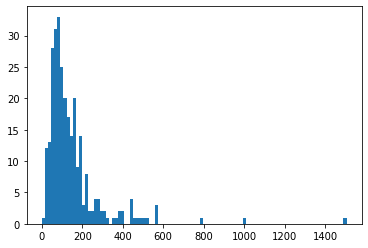

In [43]:
import matplotlib.pyplot as plt
import numpy as np
out_len = [len(o) for o in sents_swe]
plt.hist(out_len, bins=100)
plt.show()

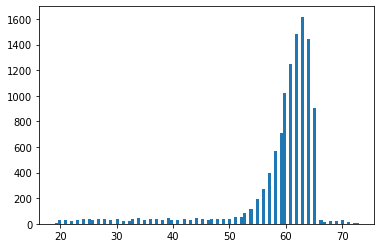

In [19]:
import matplotlib.pyplot as plt
import numpy as np
out_text = [l['text'] for l in out]
out_len = [len(o) for o in out_text]
plt.hist(out_len, bins=100)
plt.show()

In [71]:
from bert_serving.client import BertClient
bc = BertClient(port=5555, port_out=5556)

In [73]:
doc_vecs = bc.encode([example])

In [76]:
vecs = bc.encode(out)

In [77]:
np.shape(vecs)

(653, 768)